In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
FDS = pd.read_csv(r"C:\Users\rbhol\Downloads\archive (1)\financials.csv")

In [11]:
FDS.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


1. Provide a summary of the stats.

In [12]:
summary_stats = FDS.describe()
print(summary_stats)

             Price  Price/Earnings  Dividend Yield  Earnings/Share  \
count   505.000000      503.000000      505.000000      505.000000   
mean    103.830634       24.808390        1.895953        3.753743   
std     134.427636       41.241081        1.537214        5.689036   
min       2.820000     -251.530000        0.000000      -28.010000   
25%      46.250000       15.350000        0.794834        1.490000   
50%      73.920000       19.450000        1.769255        2.890000   
75%     116.540000       25.750000        2.781114        5.140000   
max    1806.060000      520.150000       12.661196       44.090000   

       52 Week Low  52 Week High    Market Cap        EBITDA  Price/Sales  \
count   505.000000    505.000000  5.050000e+02  5.050000e+02   505.000000   
mean    122.623832     83.536616  4.923944e+10  3.590328e+09     3.941705   
std     155.362140    105.725473  9.005017e+10  6.840544e+09     3.460110   
min       6.590000      2.800000  2.626102e+09 -5.067000e+09 

2. Produce a chart to show the distribution of price per sales.

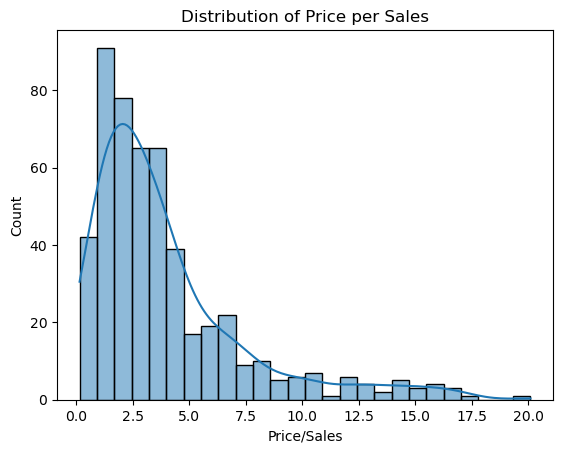

In [15]:
sns.histplot(FDS['Price/Sales'], kde=True)
plt.title('Distribution of Price per Sales')
plt.show()

3. Produce a chart to show the distribution of dividend yield. And identify stocks with the highest dividend.

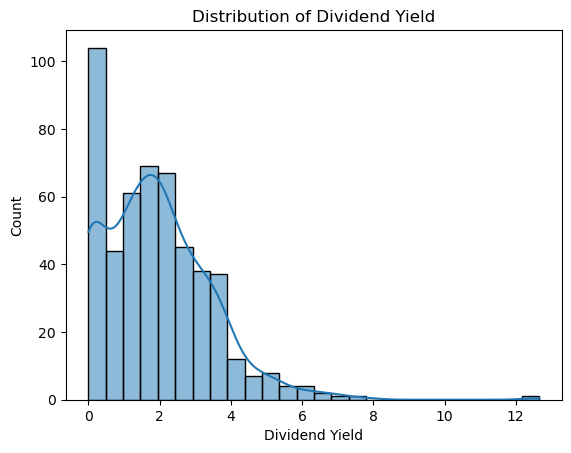

In [16]:
sns.histplot(FDS['Dividend Yield'], kde=True)
plt.title('Distribution of Dividend Yield')
plt.show()

In [17]:
high_dividend = FDS[['Symbol', 'Name', 'Dividend Yield']].sort_values(by='Dividend Yield', ascending=False).head(10)
print(high_dividend)

    Symbol                        Name  Dividend Yield
99     CTL             CenturyLink Inc       12.661196
269    KIM                Kimco Realty        7.713499
257    IRM  Iron Mountain Incorporated        7.082580
200      F                  Ford Motor        6.784387
405    SCG                  SCANA Corp        6.683033
226    HCP                    HCP Inc.        6.330197
486    HCN              Welltower Inc.        6.153846
291      M                 Macy's Inc.        6.098546
471    VTR                  Ventas Inc        5.965641
348    OKE                       ONEOK        5.443620


4. Compare the 52 week high and lows.

In [23]:
FDS['Pct_from_52_Week_High'] = (FDS['Price'] - FDS['52 Week High']) / FDS['52 Week High'] * 100
FDS['Pct_from_52_Week_Low'] = (FDS['Price'] - FDS['52 Week Low']) / FDS['52 Week Low'] * 100

print(FDS[['Symbol', 'Pct_from_52_Week_High', 'Pct_from_52_Week_Low']])

    Symbol  Pct_from_52_Week_High  Pct_from_52_Week_Low
0      MMM              27.010086            -14.197174
1      AOS              23.127236            -11.916947
2      ABT              33.088931            -12.894737
3     ABBV              80.649459            -13.808994
4      ACN              31.083435             -7.435424
..     ...                    ...                   ...
500    XYL              49.893299             -8.553574
501    YUM              21.400159            -12.228230
502    ZBH               6.804105            -13.454191
503   ZION              31.954202             -8.811365
504    ZTS              37.519231            -10.757519

[505 rows x 3 columns]


5. Make a scatter plot of price/earnings vs price/book by sector.

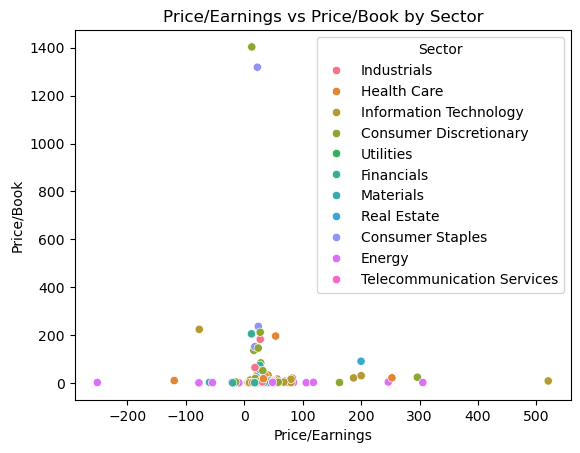

In [24]:
sns.scatterplot(x='Price/Earnings', y='Price/Book', data=FDS, hue='Sector')
plt.title('Price/Earnings vs Price/Book by Sector')
plt.show()

6. Make a scatter plot to show the price vs earnings/share

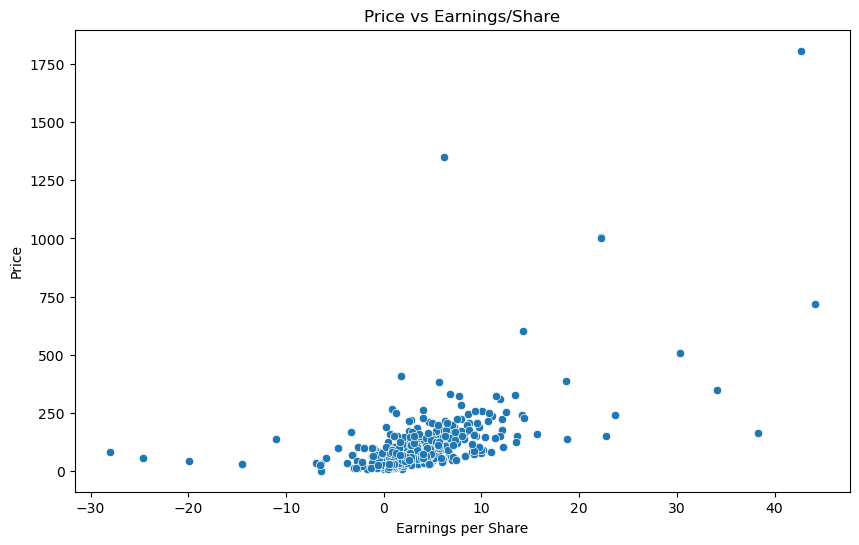

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Earnings/Share', y='Price', data=FDS)
plt.title('Price vs Earnings/Share')
plt.xlabel('Earnings per Share')
plt.ylabel('Price')
plt.show()

7. Make a bar plot of the average market cap by sector

In [30]:
sector_marketcap = FDS.groupby('Sector')['Market Cap'].mean().sort_values()

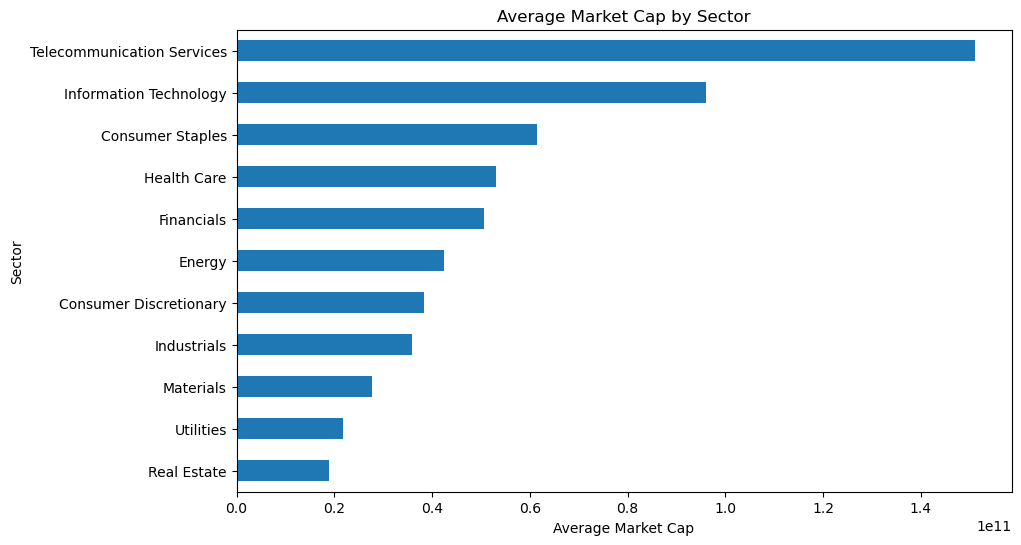

In [31]:
plt.figure(figsize=(10, 6))
sector_marketcap.plot(kind='barh')
plt.title('Average Market Cap by Sector')
plt.xlabel('Average Market Cap')
plt.ylabel('Sector')
plt.show()

In [ ]:
8. Find the top 5 most expensive stocks.

In [36]:
top_5_expensive_stocks = FDS[['Symbol', 'Price']].sort_values(by='Price', ascending=False).head(5)
print(top_5_expensive_stocks)

    Symbol    Price
372   PCLN  1806.06
30    AMZN  1350.50
27   GOOGL  1007.71
28    GOOG  1001.52
61     AZO   718.57


9. Find the price to earnings ratio summary

In [37]:
pe_summary = FDS['Price/Earnings'].describe()
print(pe_summary)

count    503.000000
mean      24.808390
std       41.241081
min     -251.530000
25%       15.350000
50%       19.450000
75%       25.750000
max      520.150000
Name: Price/Earnings, dtype: float64


10. Find the top 5 undervalued companies

In [38]:
undervalued_stocks = FDS[['Symbol', 'Price/Earnings']].sort_values(by='Price/Earnings').head(5)
print(undervalued_stocks)

    Symbol  Price/Earnings
49     APA         -251.53
245   INCY         -119.89
323    NOV          -77.71
59    ADSK          -77.07
101     CF          -59.46
